<a href="https://colab.research.google.com/github/Auzek2002/Customer_Churn_Prediction_ML/blob/main/Customer_Churn_Prediction_CodSoft_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing dependencies**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

### **Loading the Dataset**

In [ ]:
customer_raw_data = pd.read_csv('/content/Churn_Modelling.csv')

**Data Analysis**

In [ ]:
customer_raw_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
customer_raw_data.shape

(10000, 14)

In [ ]:
print(f"The number of rows of the dataset is: {customer_raw_data.shape[0]}")
print(f"The number of columns of the dataset is: {customer_raw_data.shape[1]}")

The number of rows of the dataset is: 10000
The number of columns of the dataset is: 14


In [ ]:
customer_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Checking for null values:

In [ ]:
customer_raw_data.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Checking for the sum of null values in every column:

In [ ]:
customer_raw_data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
customer_raw_data.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


HeatMap representation:

<ipython-input-17-4a8024dc2680>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = customer_raw_data.corr()


<Axes: >

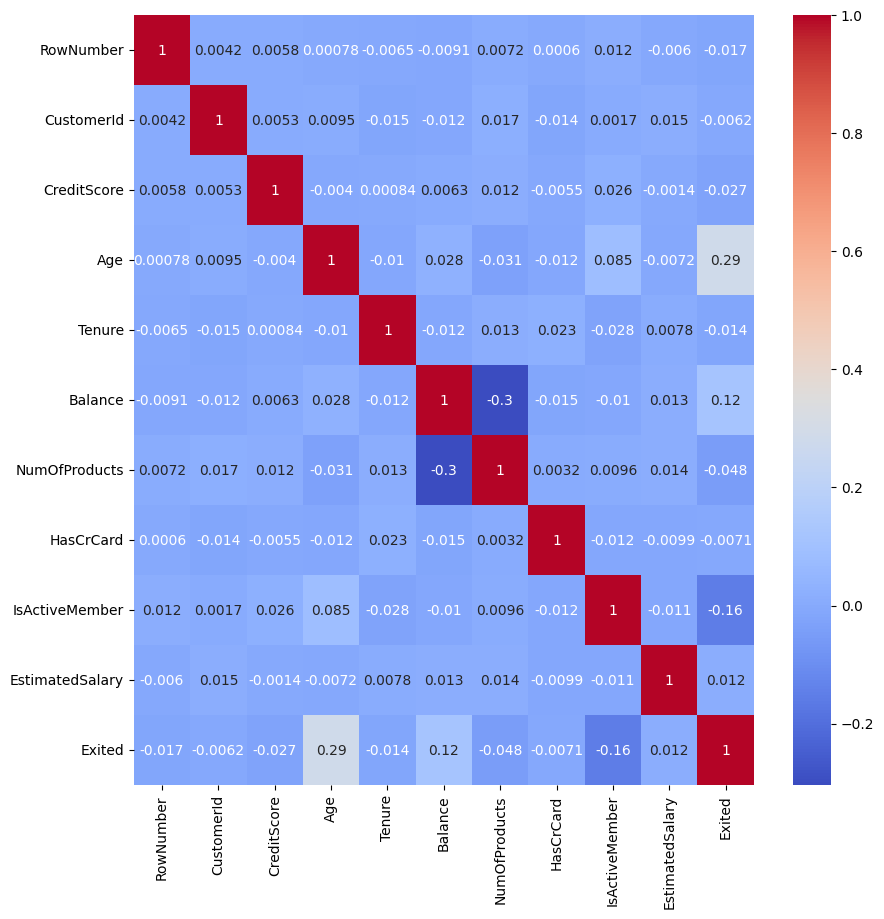

In [ ]:
corr = customer_raw_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot = True, cmap = "coolwarm")

In [ ]:
customer_raw_data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

**Feature Selection**

In [ ]:
customer_raw_data = customer_raw_data.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)
customer_raw_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Label Encoding**

In [ ]:
customer_raw_data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
customer_raw_data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
customer_data = pd.get_dummies(customer_raw_data,drop_first = True)
customer_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [ ]:
customer_data.tail()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1
9999,792,28,4,130142.79,1,1,0,38190.78,0,0,0,0


**Visualizing The Target Data (For Imbalance)**

In [ ]:
customer_data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

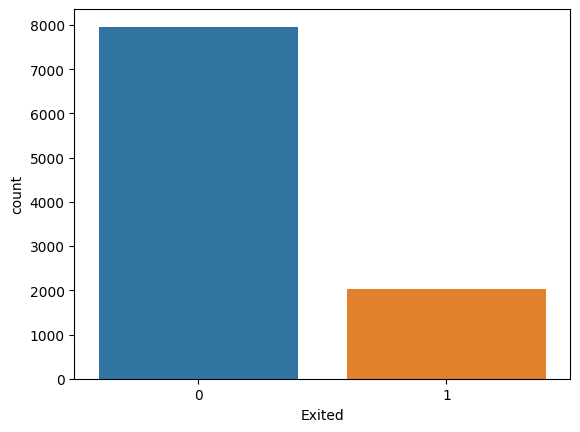

In [ ]:
sns.countplot(x = 'Exited', data = customer_data)

**Creating Target Variable and Input Features**

In [ ]:
x = customer_data.drop('Exited',axis=1)
y = customer_data['Exited']

**Making Data Balanced (Over Sampling)**

In [ ]:
x_sampled, y_sampled = SMOTE().fit_resample(x,y)

In [ ]:
y_sampled.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

**Split Data into Train and Test Samples**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_sampled,y_sampled,test_size=0.2,random_state=2)
print(f"Shape of X_train: {x_train.shape}\nShape of X_test: {x_test.shape}\nShape of Y_train: {y_train.shape}\nShape of Y_test: {y_test.shape} ")

Shape of X_train: (12740, 11)
Shape of X_test: (3186, 11)
Shape of Y_train: (12740,)
Shape of Y_test: (3186,) 


**Feature Scaling (Due to features having different ranges)**

Before scaling:

In [ ]:
print(x_train)

       CreditScore  Age  Tenure        Balance  NumOfProducts  HasCrCard  \
10891          738   37       2  162399.552374              1          0   
377            572   35       4  152390.260000              1          1   
527            610   26       8       0.000000              2          1   
12673          616   65       1  135834.136978              1          1   
9635           547   49       2       0.000000              1          0   
...            ...  ...     ...            ...            ...        ...   
11798          679   36       2  116897.099415              1          0   
13896          619   46       5  150284.668233              1          0   
6637           850   36       3       0.000000              2          1   
2575           551   54       5  102994.040000              1          1   
7336           654   28       7       0.000000              2          1   

       IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
10891    

In [ ]:
print(x_test)

       CreditScore  Age  Tenure        Balance  NumOfProducts  HasCrCard  \
4745           768   49       1  133384.660000              1          1   
3401           591   33       4  113743.370000              1          1   
12870          489   30       4  135592.628238              1          0   
10491          615   42       4   72230.316265              1          0   
8385           605   62       4  111065.930000              2          0   
...            ...  ...     ...            ...            ...        ...   
2909           594   38       6   63176.440000              2          1   
2405           685   35       9       0.000000              1          1   
6789           668   46       0       0.000000              2          0   
3324           808   47       8  139196.000000              1          0   
8255           575   40       1  139532.340000              1          1   

       IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
4745     

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

After scaling:

In [ ]:
print(x_train)    #after scaling they become numpy arrays

[[ 0.97409916 -0.39376535 -1.03618873 ... -0.58278854  2.17449242
  -0.83762529]
 [-0.8394443  -0.59436799 -0.30334701 ... -0.58278854  2.17449242
   1.19385124]
 [-0.4242958  -1.49707988  1.16233645 ... -0.58278854 -0.45987744
   1.19385124]
 ...
 [ 2.19769474 -0.49406667 -0.66976787 ... -0.58278854 -0.45987744
   1.19385124]
 [-1.06886847  1.31135711  0.06307386 ...  1.71588824 -0.45987744
   1.19385124]
 [ 0.05640247 -1.29647724  0.79591558 ... -0.58278854 -0.45987744
  -0.83762529]]


In [ ]:
print(x_test)

[[ 1.30184797  0.8098505  -1.4026096  ...  1.71588824 -0.45987744
   1.19385124]
 [-0.63187005 -0.79497063 -0.30334701 ... -0.58278854 -0.45987744
  -0.83762529]
 [-1.74621603 -1.0958746  -0.30334701 ... -0.58278854 -0.45987744
  -0.83762529]
 ...
 [ 0.20935192  0.50894654 -1.76903046 ... -0.58278854 -0.45987744
   1.19385124]
 [ 1.7388464   0.60924786  1.16233645 ... -0.58278854  2.17449242
   1.19385124]
 [-0.80666942 -0.09286139 -1.4026096  ... -0.58278854 -0.45987744
  -0.83762529]]


**Training the Model (Using Logistic Regression)**

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(x_train)

**Evaluating the model on the training data**

Accuracy Score of predictions on Training data

In [ ]:
accuracy_score(y_train,y_pred)

0.7755886970172684

Precision Score of predictions on Training data

In [ ]:
precision_score(y_train,y_pred)

0.7712700369913686

Recall Score of predictions on Training data

In [ ]:
recall_score(y_train,y_pred)

0.7844489731932904

F1 Score of predictions on Training data

In [ ]:
f1_score(y_train,y_pred)

0.7778036838423874

**Evaluating the model on the testing data**

In [ ]:
y_pred2 = model.predict(x_test)

Accuracy Score of predictions on Testing data

In [ ]:
accuracy_score(y_test,y_pred2)

0.783427495291902

Precision Score of predictions on Testing data

In [ ]:
precision_score(y_test,y_pred2)

0.7762669962917181

Recall Score of predictions on Testing data

In [ ]:
recall_score(y_test,y_pred2)

0.7929292929292929

F1 Score of predictions on Testing data

In [ ]:
f1_score(y_test,y_pred2)

0.7845096814490943